In [2]:
import pandas as pd
import matplotlib.pyplot as plt



In [6]:
tweets = pd.read_csv("tweets.csv", sep = ";", error_bad_lines = False)
tweets = tweets.fillna(0)


Skipping line 867: expected 11 fields, saw 12
Skipping line 1529: expected 11 fields, saw 12
Skipping line 3268: expected 11 fields, saw 12
Skipping line 4697: expected 11 fields, saw 12



,username,date,retweets,favorites,text,geo,mentions,hashtags,id,query,permalink
0,NS_online,2017-12-13 23:40,0,0,"Nee, daar heb je een punt. Ook heel vervelend ...",0,0,0,9.410603e+17,aansluiting AND gemist,https://twitter.com/NS_online/status/941060315...
1,Flycoman,2017-12-13 18:58,0,0,En gister ochtend had ik ook al de aansluiting...,0,0,0,9.409894e+17,aansluiting AND gemist,https://twitter.com/Flycoman/status/9409894111...
2,elzet15,2017-12-13 18:42,0,0,"Moeten ze wel rijden. Bovenleiding stuk, koper...",0,0,0,9.409853e+17,aansluiting AND gemist,https://twitter.com/elzet15/status/94098526666...
3,delaculotte,2017-12-13 17:56,0,0,@PolitieMeWi Topidee om in station mechelen dr...,0,@PolitieMeWi,#aansluitinggemist,9.409736e+17,aansluiting AND gemist,https://twitter.com/delaculotte/status/9409735...
4,BartRikers,2017-12-13 16:59,0,0,"Dat wel, helaas wel mijn aansluiting in Utrech...",0,0,0,9.409594e+17,aansluiting AND gemist,https://twitter.com/BartRikers/status/94095937...
5,Klaske1984,2017-12-13 12:40,0,0,@NS_online hoe zit het met geld terug vragen o...,0,@NS_online,0,9.408942e+17,aansluiting AND gemist,https://twitter.com/Klaske1984/status/94089417...
6,EvaHopstaken,2017-12-13 12:32,0,0,Tijd doden (want 2 uur wachten omdat ik door v...,0,@Grand,0,9.408922e+17,aansluiting AND gemist,https://twitter.com/EvaHopstaken/status/940892...
7,biancaberentsen,2017-12-13 11:55,0,0,Ik weet niet wie er bij @NS_online beslist wel...,0,@NS_online,0,9.408828e+17,aansluiting AND gemist,https://twitter.com/biancaberentsen/status/940...
8,NS_online,2017-12-13 11:52,0,0,Excuus voor de late reactie Jeroen. Erg vervel...,0,0,0,9.408822e+17,aansluiting AND gemist,https://twitter.com/NS_online/status/940882167...
9,EvaHopstaken,2017-12-13 11:31,0,0,aansluiting gemist . Nu naar Hengelo... #Trein...,0,0,#Treinleven,9.408769e+17,aansluiting AND gemist,https://twitter.com/EvaHopstaken/status/940876...


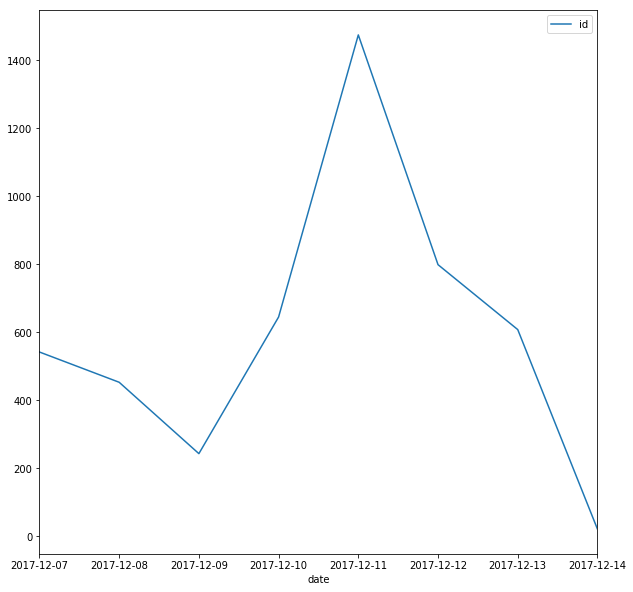

In [25]:
tweets["date"] = pd.to_datetime(tweets["date"])



dates = pd.DataFrame()
dates["id"] = tweets["id"]
dates["date"] = tweets["date"].map(lambda x: x.date())


dates.groupby(dates["date"]).count().plot(figsize = (10, 10))
plt.show()